In [ ]:
#Processing in the PDFs

In [1]:
import os
import pandas as pd
import requests
from natural_pdf import PDF

df = pd.read_csv("gsr_data_2013_2014.csv")

pdf_folder = "pdfs"
os.makedirs(pdf_folder, exist_ok=True)
for _, row in df.iterrows():
    url = row["PDF_URL"]
    school = row["School"]
    filename = f"{school.replace(' ', '_').replace(',', '')}.pdf"
    filepath = os.path.join(pdf_folder, filename)

    if os.path.exists(filepath):
        print(f"Already downloaded: {school}")
        continue

    try:
        print(f"Downloading: {school}")
        response = requests.get(url, timeout=30)
        response.raise_for_status()
        with open(filepath, "wb") as f:
            f.write(response.content)
        print(f"Saved to {filepath}")
    except Exception as e:
        print(f"Failed to download {school}: {e}")

pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    print(f"Processing: {filename}")
    
    pdf = PDF(filepath)
    
    if not pdf.pages:
        print("No pages found in this PDF.")
        continue

    try:
        pdf.pages[0].find("text").show()
    except Exception as e:
        print(f"Could not show bounding boxes for {filename}: {e}")

KeyboardInterrupt: 

In [3]:
pdf_folder = "pdfs"

pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:5]

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    print(f"Processing: {filename}")
    
    pdf = PDF(filepath)
    
    if not pdf.pages:
        print("No pages found in this PDF.")
        continue
    
    page = pdf.pages[0]
    
    # Show bounding boxes for text
    page.find("text").show()

[2025-08-12 13:16:16,247] [ WARNING] surya.py:27 - Could not import Surya dependencies (layout and/or table_rec): No module named 'surya.common'


Processing: Abilene_Christian_University.pdf


KeyboardInterrupt: 

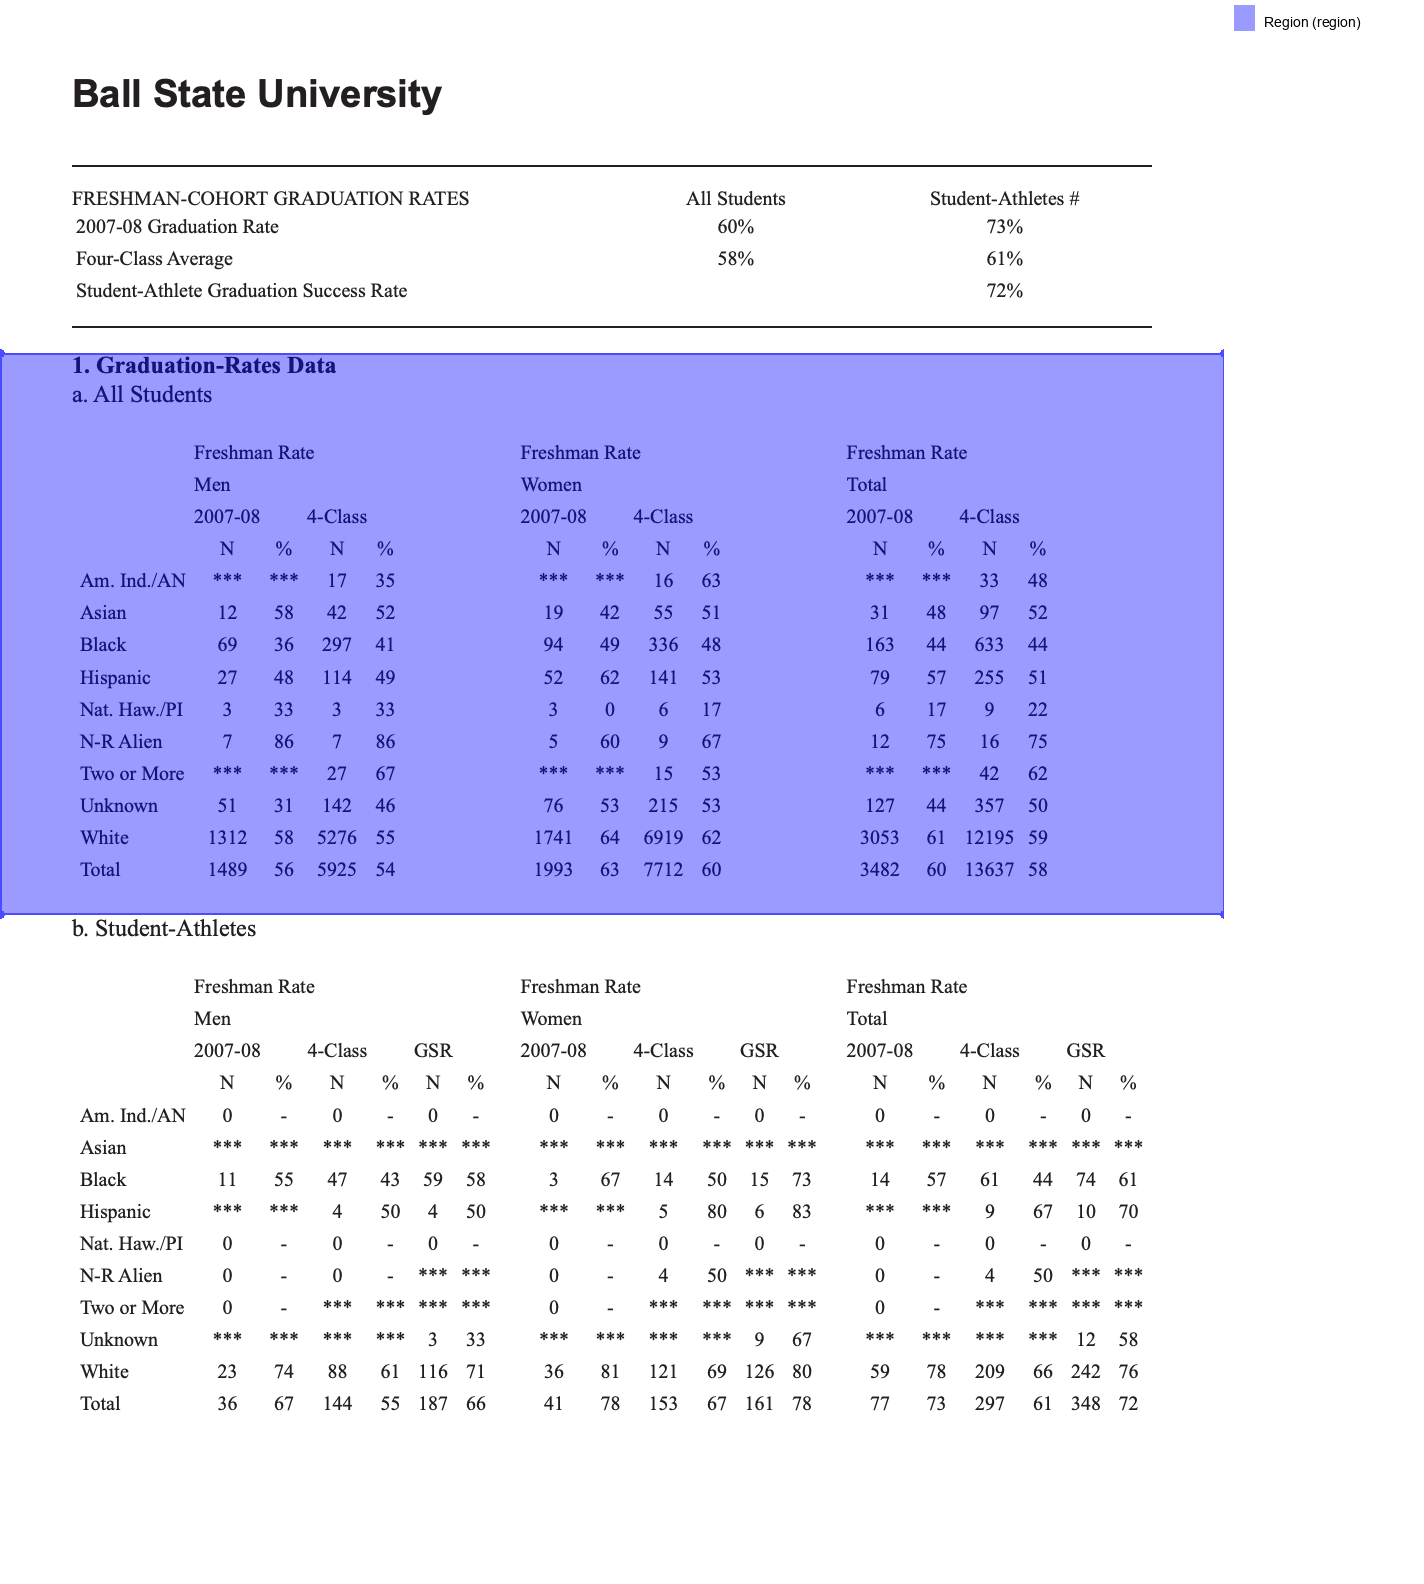

In [5]:
(
    page
    .find(text='b. Student-Athletes')
    .above(until='text:contains("Graduation-Rates Data")')
    .show()
)

In [34]:
rows = table.extract_table(table_settings={'snap_y_tolerance': 5})
rows

[['',
  '2007-08',
  '',
  '4-Class',
  '',
  '2007-08',
  '',
  '4-Class',
  '',
  '2007-08',
  '',
  '4-Class',
  ''],
 ['', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['', 'N', '%', 'N', '%', 'N', '%', 'N', '%', 'N', '%', 'N', '%'],
 ['', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['Am. Ind./AN',
  '22',
  '59',
  '58',
  '60',
  '15',
  '73',
  '50',
  '78',
  '37',
  '65',
  '108',
  '69'],
 ['', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['Asian',
  '354',
  '61',
  '1086',
  '64',
  '199',
  '78',
  '638',
  '81',
  '553',
  '67',
  '1724',
  '70'],
 ['', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['Black',
  '33',
  '58',
  '106',
  '56',
  '15',
  '47',
  '60',
  '72',
  '48',
  '54',
  '166',
  '61'],
 ['', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['Hispanic',
  '311',
  '55',
  '880',
  '56',
  '198',
  '72',
  '612',
  '75',
  '509',
  '61',
  '1492',
  '64'],
 ['', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['Nat. Haw./PI',
  '12

In [35]:
base_header = rows[0][1:]
sub_header = rows[1][1:]

combined_cols = [f"{b} {s}" for b, s in zip(base_header, sub_header)]

full_header = ['Race'] + combined_cols
data = rows[2:]
df = pd.DataFrame(data, columns=full_header)
df

,Race,2007-08,,4-Class,,2007-08,,4-Class,,2007-08,,4-Class,
0,,N,%,N,%,N,%,N,%,N,%,N,%
1,,,,,,,,,,,,,
2,Am. Ind./AN,22,59,58,60,15,73,50,78,37,65,108,69
3,,,,,,,,,,,,,
4,Asian,354,61,1086,64,199,78,638,81,553,67,1724,70
5,,,,,,,,,,,,,
6,Black,33,58,106,56,15,47,60,72,48,54,166,61
7,,,,,,,,,,,,,
8,Hispanic,311,55,880,56,198,72,612,75,509,61,1492,64
9,,,,,,,,,,,,,


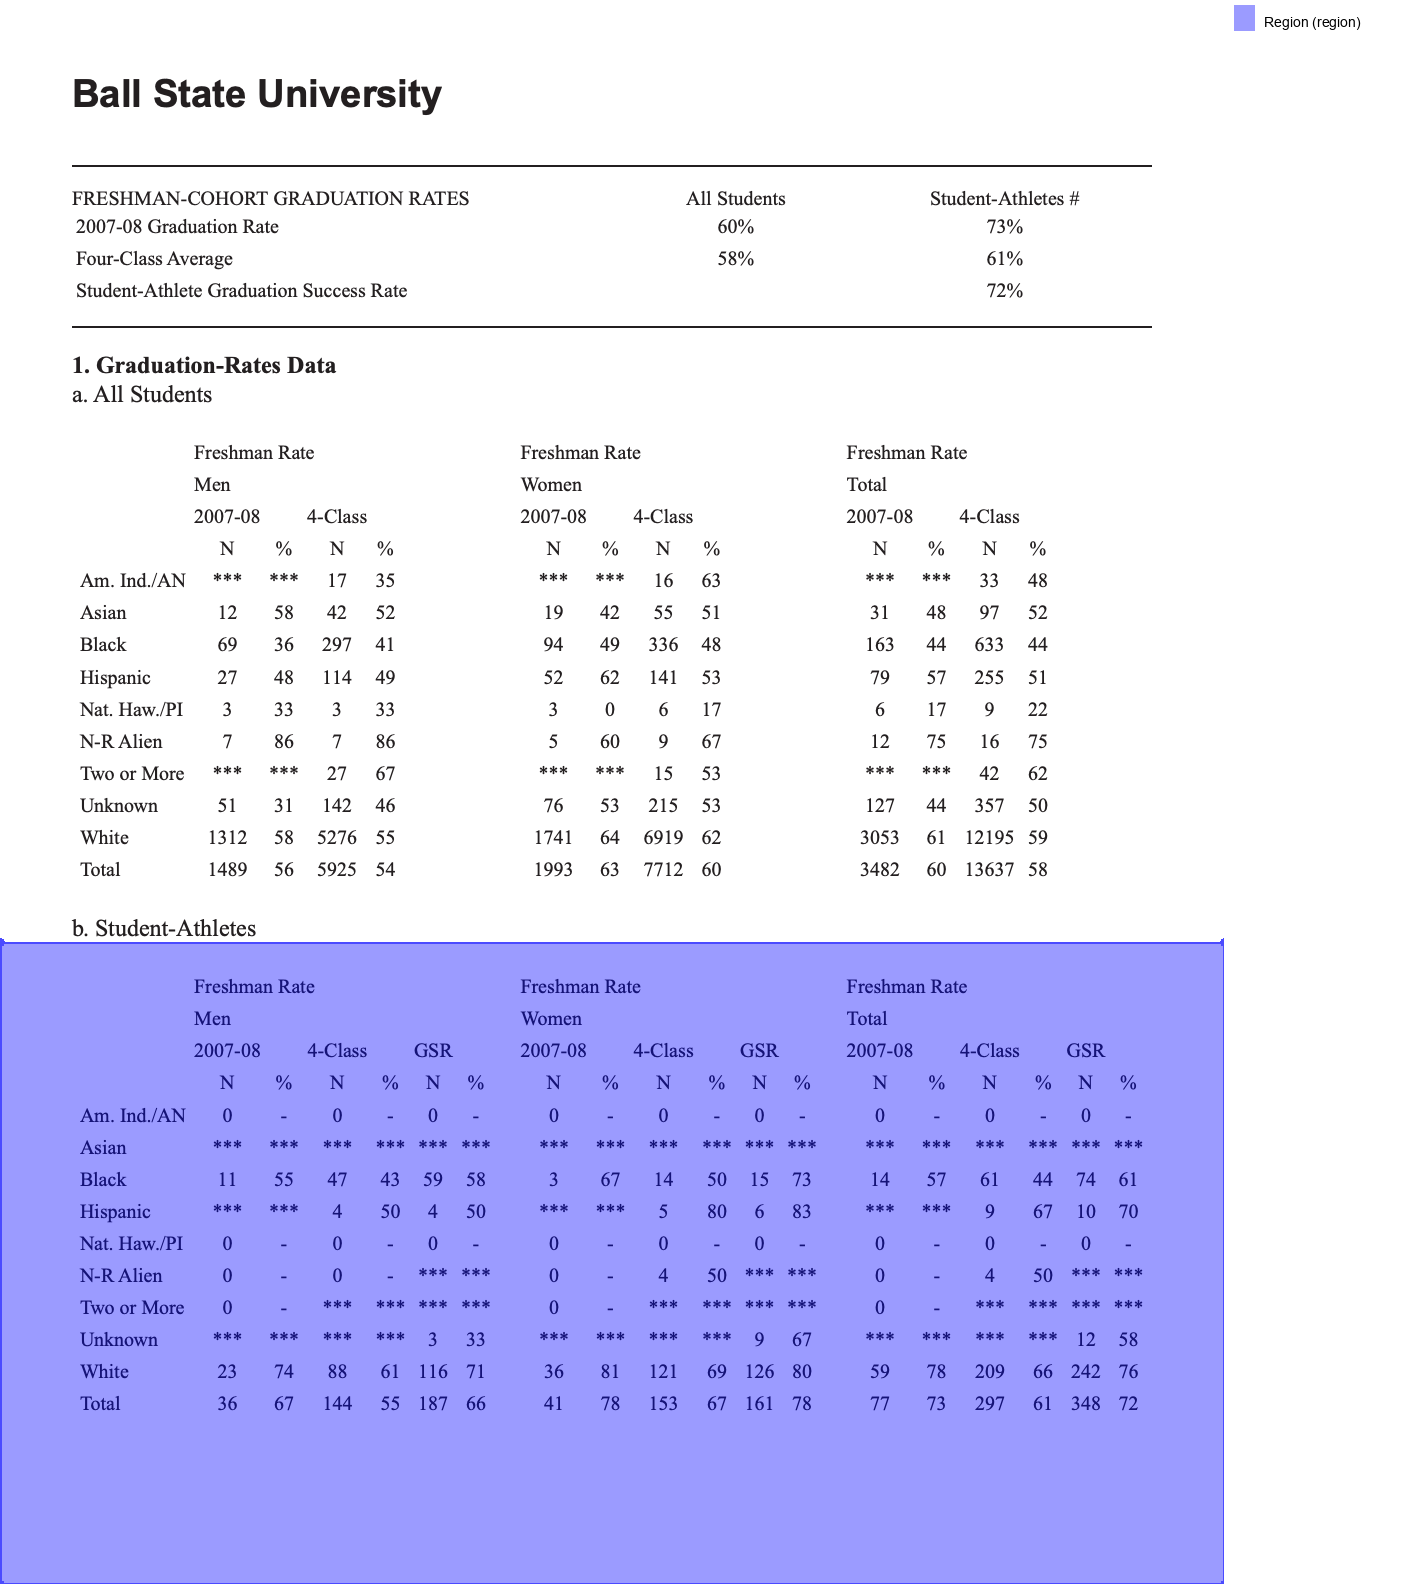

In [36]:
table_2 = (
    page

    .find(text='b. Student-Athletes')
    .below()
)
table_2.show()

In [37]:
rows_2 = table_2.extract_table(table_settings={'snap_y_tolerance': 5})
rows_2

[['',
  '2007-08',
  '',
  '4-Class',
  '',
  'GSR',
  '',
  '2007-08',
  '',
  '4-Class',
  '',
  'GSR',
  '',
  '2007-08',
  '',
  '4-Class',
  '',
  'GSR',
  ''],
 ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%',
  'N',
  '%'],
 ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['Am. Ind./AN',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-',
  '0',
  '-'],
 ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['Asian',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***',
  '***'],
 ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['Black',
  '11',
  '55',
  '47',
  '43',
  '59',
  '58',
  '3',
 

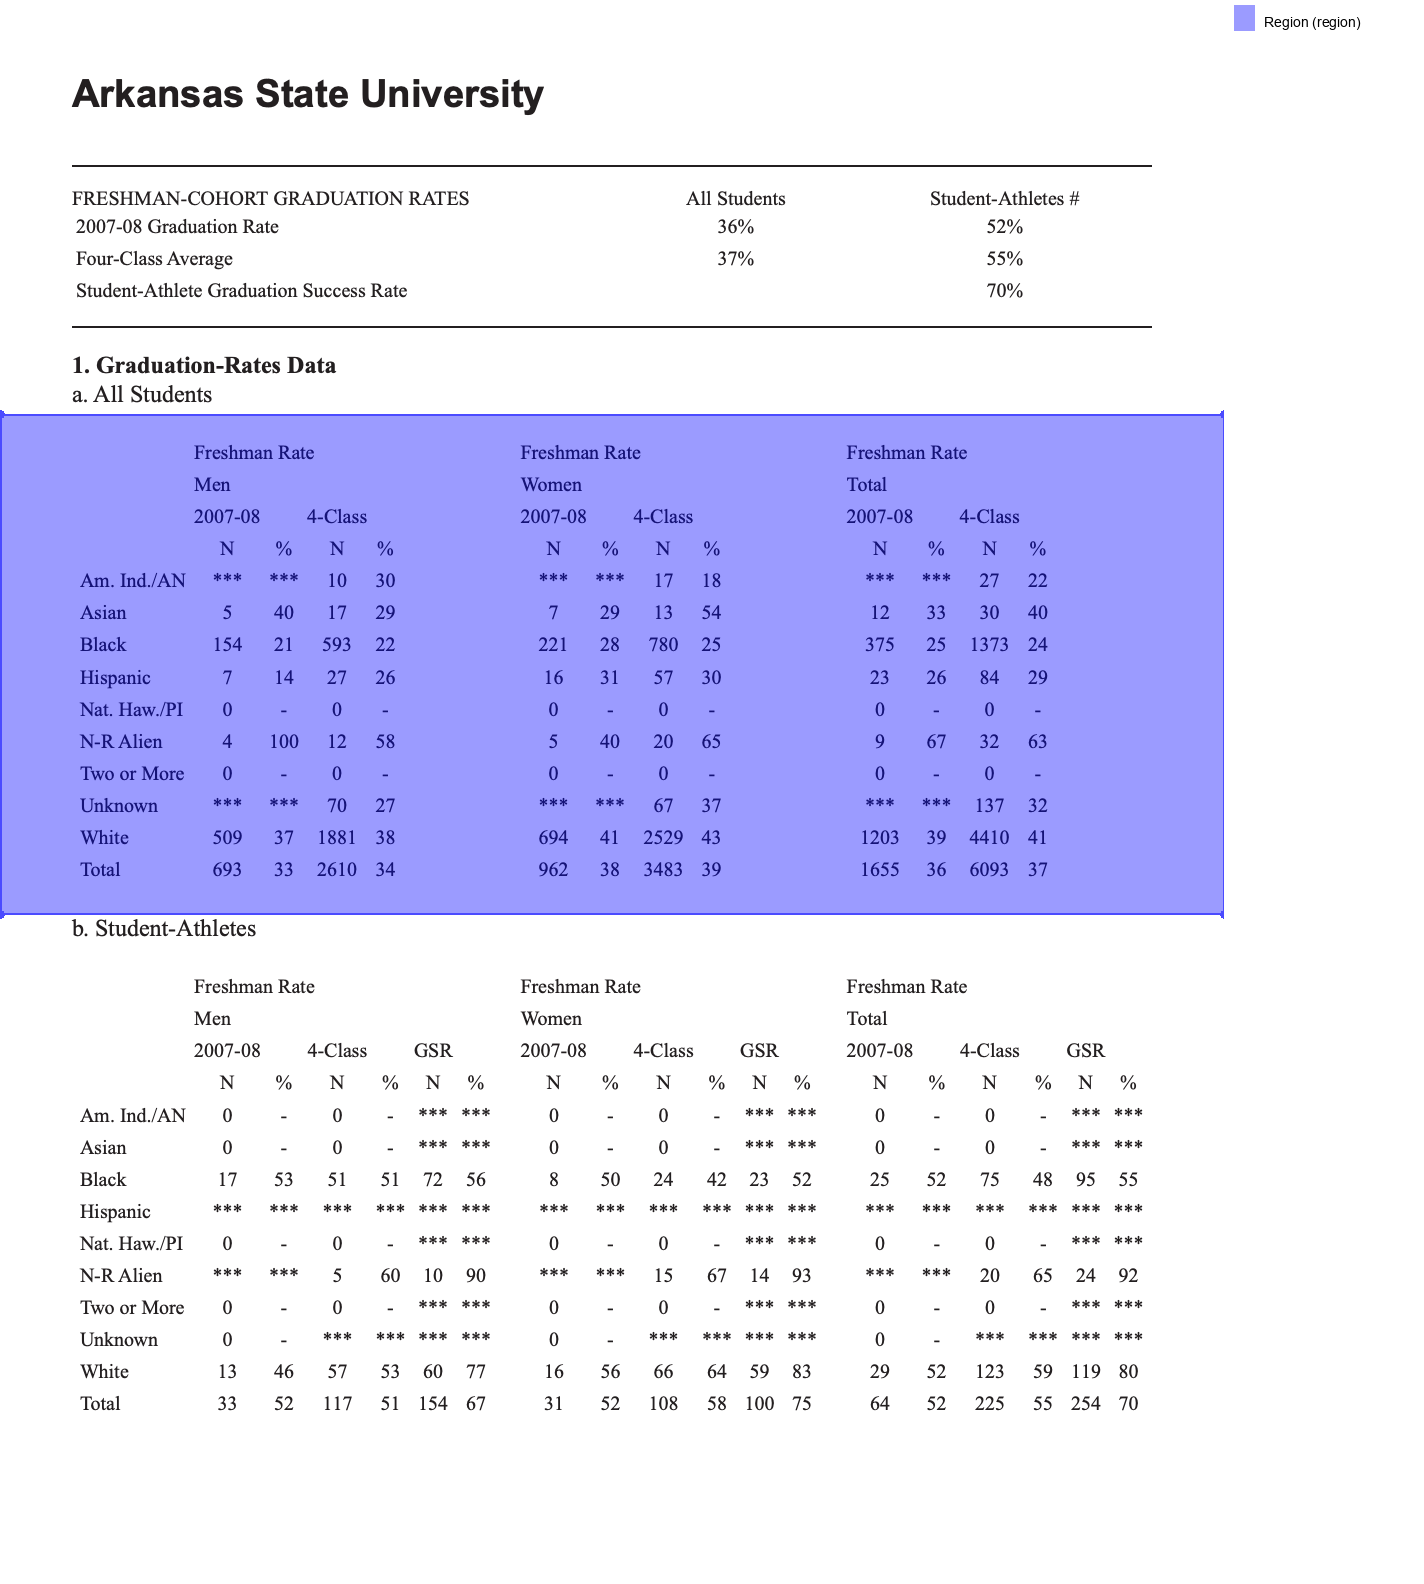

In [47]:
page.region(top=207, height=250).show()

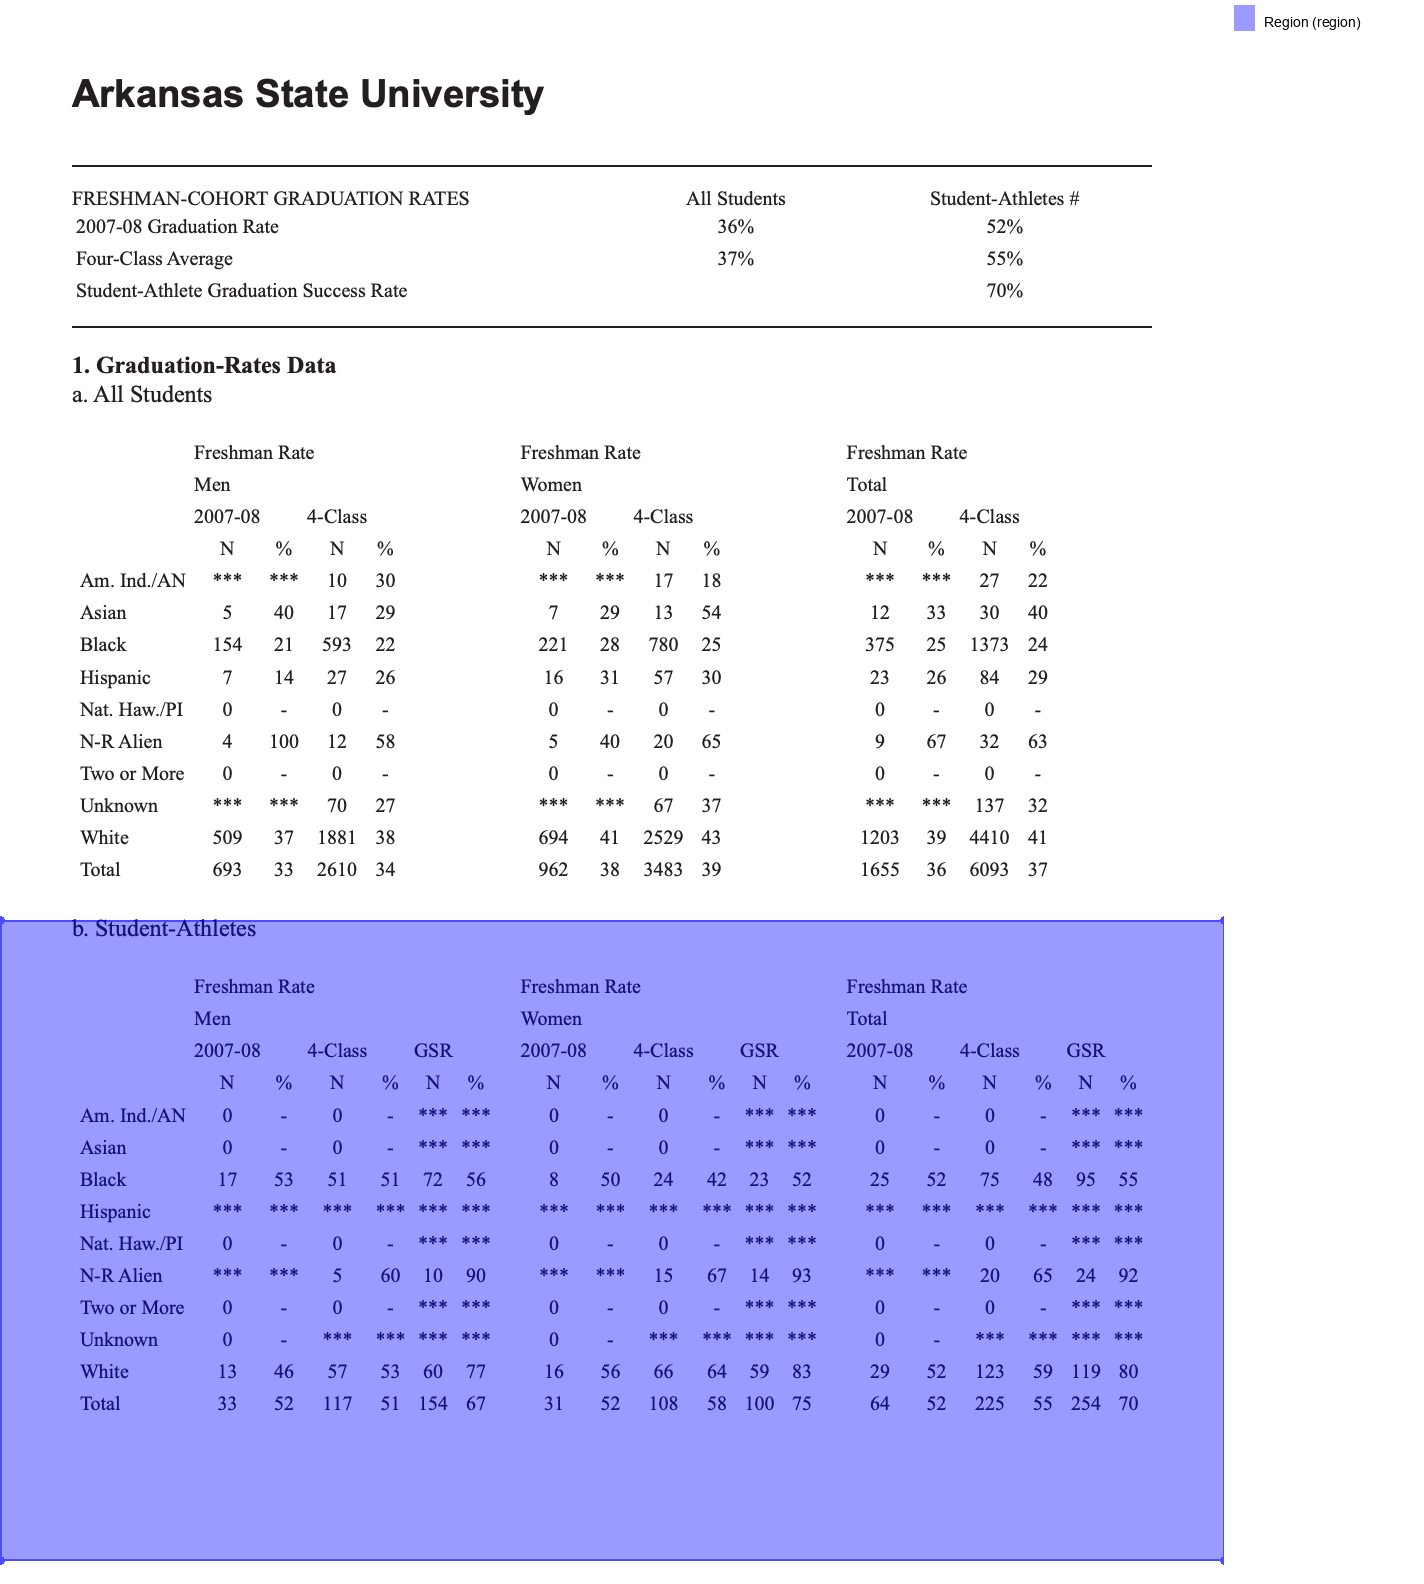

In [43]:
page.region(top=460, height=320).show()

In [4]:
import re

race_labels = [
    "Am. Ind./AN", "Asian", "Black", "Hispanic",
    "Nat. Haw./PI", "N-R Alien", "Two or More",
    "Unknown", "White", "Total"
]

def extract_race_rows(text_block, race_labels):
    rows = []
    current_race = None
    for line in text_block:
        line = line.strip()
        if not line:
            continue
        matched = False
        for race in race_labels:
            if line.startswith(race):
                current_race = race
                values = line.replace(race, "").strip().split()
                rows.append([race] + values)
                matched = True
                break
        if not matched and current_race and rows:
            # Continuation of previous line
            rows[-1].extend(line.split())

    if not rows:
        return pd.DataFrame()

    col_count = max(len(r) for r in rows)
    col_names = ["Race"] + [f"val{i}" for i in range(1, col_count)]
    df = pd.DataFrame(rows, columns=col_names[:col_count])

    df = df[df["Race"].isin(race_labels)]

    return df

def process_pdf(filepath, race_labels):
    pdf = PDF(filepath)
    if not pdf.pages:
        return None
    page = pdf.pages[0]
    try:
        all_region = page.region(top=207, height=250)
        all_lines = all_region.extract_text().splitlines()
        df_all = extract_race_rows(all_lines, race_labels)
        df_all["Source"] = "All Students"
        sa_region = page.region(top=460, height=360)
        sa_lines = sa_region.extract_text().splitlines()
        df_sa = extract_race_rows(sa_lines, race_labels)
        df_sa["Source"] = "Student-Athletes"

        return df_all, df_sa

    except Exception as e:
        print(f"Error in {os.path.basename(filepath)}: {type(e).__name__}: {e}")
        return None

pdf_folder = "pdfs"
pdf_files = sorted(f for f in os.listdir(pdf_folder) if f.endswith(".pdf")) 
all_data = []

for f in pdf_files:
    filepath = os.path.join(pdf_folder, f)
    school = f.replace(".pdf", "").replace("_", " ")
    result = process_pdf(filepath, race_labels)
    if result:
        df_all, df_sa = result
        df_all["School"] = school
        df_sa["School"] = school
        try:
            combined = pd.merge(df_all, df_sa, on="Race", suffixes=("_All", "_SA"))
            all_data.append(combined)
        except Exception as e:
            print(f"Merge failed for {school}: {e}")

if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.to_csv("10yrspage1_all_cleaned.csv", index=False)
    print("Saved to 10yrspage1_all_cleaned.csv")
else:
    print("No data extracted.")

KeyboardInterrupt: 

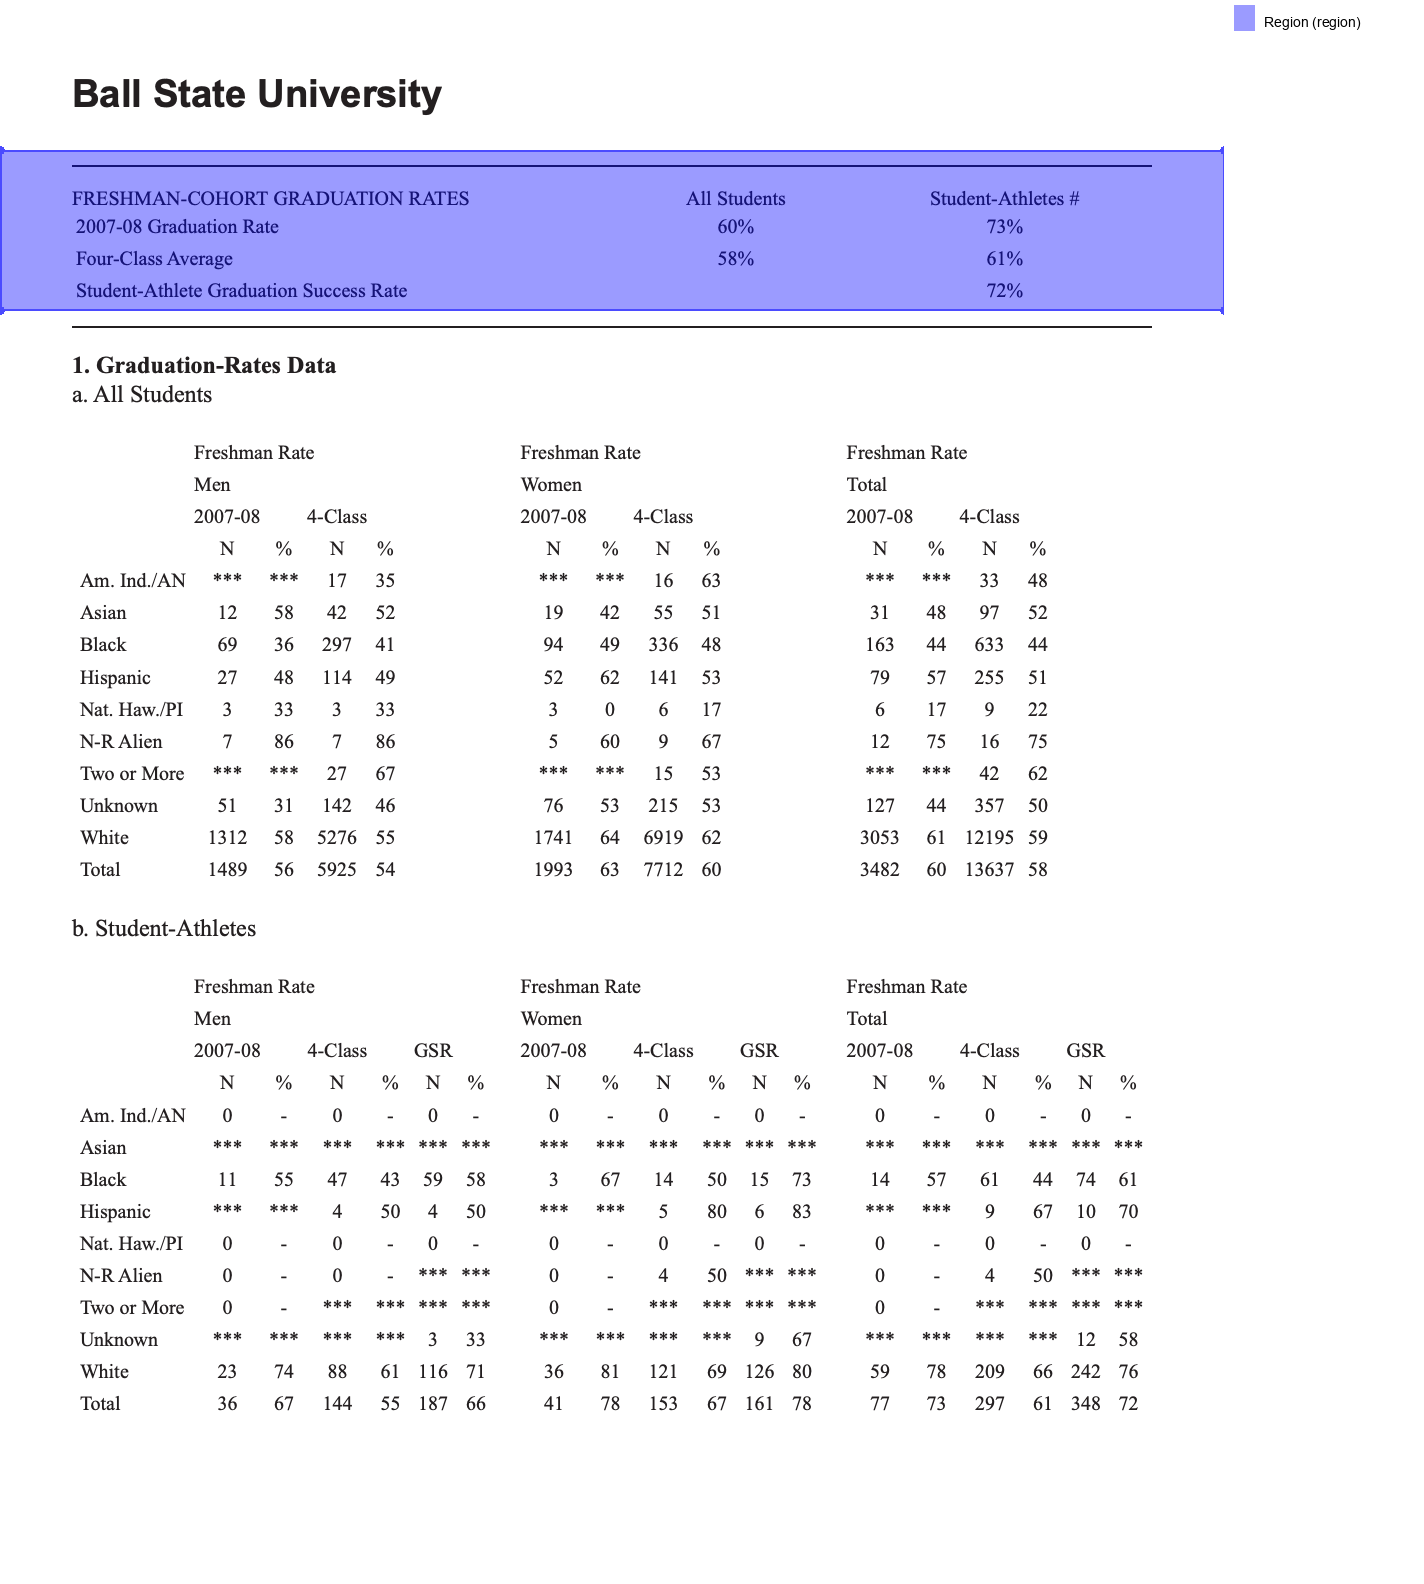

In [9]:
top_table = page.region(top=75, height=80)
top_table.show()

In [5]:
pdf_folder = "pdfs" 
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])
all_data = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school = filename.replace(".pdf", "").replace("_", " ").strip()

    try:
        pdf = PDF(filepath)
        if not pdf.pages:
            print(f"Skipping {school}: No pages")
            continue

        page = pdf.pages[0]
        region = page.region(top=75, height=80)
        table = region.extract_table()

        if not table or len(table) < 3:
            print(f"Skipping {school}: Table too short or missing")
            continue

        data_rows = [row for row in table if any(cell.strip() for cell in row)]
        for row in data_rows:
            metric = row[0].strip()
            all_students = row[1].strip() if len(row) > 1 else ""
            student_athletes = row[2].strip() if len(row) > 2 else ""
            all_data.append({
                "School": school,
                "Metric": metric,
                "All Students": all_students,
                "Student-Athletes": student_athletes
            })

        print(f"Processed {school}")

    except Exception as e:
        print(f"Failed {school}: {e}")

if all_data:
    df = pd.DataFrame(all_data)
    df.to_csv("1st_all_top_table_structured.csv", index=False)
    print("Saved to 1st_all_top_table_structured.csv")
else:
    print("No data extracted.")

Processed Abilene Christian University
Processed Alabama A&M University
Processed Alabama State University


KeyboardInterrupt: 

In [ ]:
#Now doing the same process for the top table on the page

In [6]:
df_old = pd.read_csv("1st_all_top_table_structured_fixed_all.csv")
df_new = pd.read_csv("1st_all_top_table_structured.csv")

df_old["Year"] = "2013-14"
df_new["Year"] = "2023-24"

df_combined = pd.concat([df_old, df_new], ignore_index=True)

invalid_fillers = ["Student-Athletes", "Students Studen", "Student Studen", "-", "–", ""]
df_clean = df_combined[
    (~df_combined["All Students"].isin(invalid_fillers)) &
    (~df_combined["Student-Athletes"].isin(invalid_fillers))
]

valid_metrics = [
    "2007-08 Graduation Rate",
    "Four-Class Average",
    "Student-Athlete Academic Success Rate",
    "FRESHMAN-COHORT GRADUATION RATES All Students",
    "Student-Athlete Graduation Success Rate",
    "2017-18 Graduation Rate"
]
df_clean = df_clean[df_clean["Metric"].isin(valid_metrics)]

df_wide = df_clean.pivot_table(
    index=["School", "Metric"],
    columns="Year",
    values=["All Students", "Student-Athletes"],
    aggfunc="first"
)
df_wide.columns = [f"{col[0]} {col[1]}" for col in df_wide.columns]
df_wide = df_wide.reset_index()

df_wide.to_csv("combined_clean_wide_format.csv", index=False)

import ace_tools as tools; tools.display_dataframe_to_user(name="Cleaned Wide Format", dataframe=df_wide)

FileNotFoundError: [Errno 2] No such file or directory: '1st_all_top_table_structured.csv'